### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

**SOLUCIÓN DEL EJERCICIO PROPUESTO**

**PARTE 1:**

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
$$G_{LC}(s) = \frac{\frac{5}{s^2 + 6s + 5}}{1 +\frac{5}{s^2 + 6s + 5}}$$
$$G_{LC}(s) = \frac{\frac{5}{s^2 + 6s + 5}}{\frac{s^2 + 6s + 5 + 5}{s^2 + 6s + 5}}$$
$$G_{LC}(s) = \frac{\frac{5}{s^2 + 6s + 5}}{\frac{s^2 + 6s + 10}{s^2 + 6s + 5}}$$
$$G_{LC}(s) = \frac{{5}}{{s^2 + 6s + 10}}$$



Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[287]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10


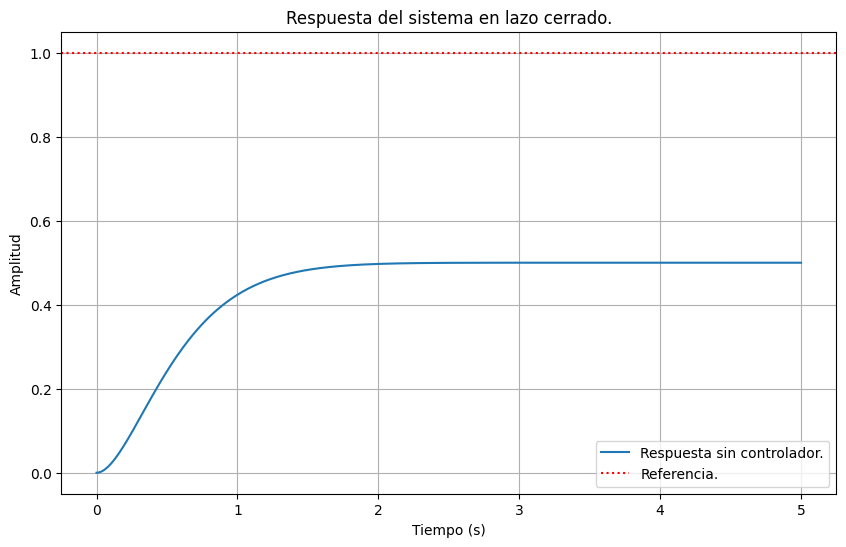

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]


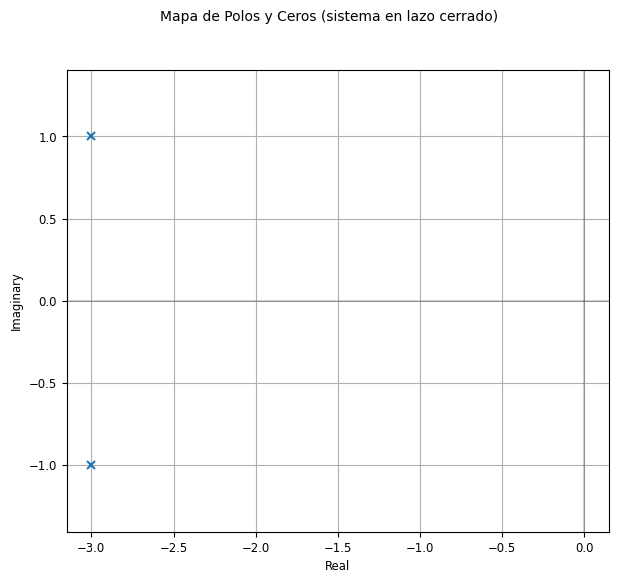

In [40]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_base)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros (sistema en lazo cerrado)')
plt.grid(True)
plt.show()

**PARTE 2:**

In [41]:
# --- Parámetros del controlador Proporcional-Derivativo. ---
Kp = 30
Kd = 5
Ki = 25

# --- Creación del controlador PID . ---
# El numerador es [Kd, Kp].
Gc_PID = ct.tf([Kd, Kp, Ki], [1, 0])

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}% ")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

Métricas de desempeño del sistema con controlador Proporcional-Derivativo:
  - Sobreimpulso (Overshoot): 0.00% 
  - Tiempo de establecimiento (SettlingTime): 0.16 s
  - Valor final: 0.9996
  - Error en estado estacionario (1 - valor_final): 0.0004


El razonamiento que tome en cuenta para calcular mis ganacias fueron:

Dado:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$

Y tomando en cuenta que:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

Si, tomamos en cuenta $${K_d s^2 + K_p s + K_i}$$ junto con el Polinomio caracteristico de la función planta:

$${K_d s^2 + K_p s + K_i = s^2 + 6s + 5}$$

Obtenemos que los valores 
$K_d > 0 $,
$K_p > 0 $,
$K_i > 0 $
Tal que, si proponemos $K_d = 1 $, $K_p = 6 $, $K_i = 5 $ los valores nos dan exactamente un error=0, un tiempo de establecimiento menor a 1 segundo y un sobreimpulso menor al 5%.

Sin embargo, en mi caso multiplique cada ganancia por 5 para obtener un tiempo de establecimiento más bajo. 

---

**PARTE 3:**

Dado las ganancias

$K_d = 5 $ 

$K_p = 30 $ 

$K_i = 25 $

La función de transferencia quedaría:

$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
$$G_c(s) = \frac{5 s^2 + 30 s + 25}{s}$$

La nueva función de transferencia en lazo cerrado con el controlador quedaría:

$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

$$G_{LC_{PID}}(s) = \frac{(\frac{5 s^2 + 30 s + 25}{s}) (\frac{5}{s^2 + 6s + 5})}{1 + (\frac{5 s^2 + 30 s + 25}{s}) (\frac{5}{s^2 + 6s + 5})}$$

$$G_{LC_{PID}}(s) = \frac{\frac{(5 s^2 + 30 s + 25)(5)}{(s)(s^2 + 6s + 5)}}{1 + \frac{(5 s^2 + 30 s + 25)
(5)}{(s)(s^2 + 6s + 5)}}$$

$$G_{LC_{PID}}(s) = \frac{\frac{(5 s^2 + 30 s + 25)(5)}{(s)(s^2 + 6s + 5)}}{\frac{(5 s^2 + 30 s + 25)
(5)+(s)(s^2 + 6s + 5)}{(s)(s^2 + 6s + 5)}}$$

$$G_{LC_{PID}}(s) = \frac{{(5 s^2 + 30 s + 25)(5)}}{{(5 s^2 + 30 s + 25)(5)+(s)(s^2 + 6s + 5)}}$$

$$G_{LC_{PID}}(s) = \frac{{25 s^2 + 150 s + 125}}{{(25 s^2 + 150 s + 125)+(s^3 + 6s^2 + 5s)}}$$

$$G_{LC_{PID}}(s) = \frac{{25 s^2 + 150 s + 125}}{{s^3 + 31 s^2 + 155 s + 125}}$$

$$G_{LC_{PID}}(s) = \frac{{(25)(s^2 + 6s + 5)}}{{(s + 25)(s^2 + 6s + 5)}}$$

$$G_{LC_{PID}}(s) = \frac{{(25)(s^2 + 6s + 5)}}{{(s + 25)(s^2 + 6s + 5)}}$$

$$G_{LC_{PID}}(s) = \frac{{25}}{{s + 25}}$$


Función de Transferencia del sistema con PID:
<TransferFunction>: sys[301]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     25 s^2 + 150 s + 125
  --------------------------
  s^3 + 31 s^2 + 155 s + 125


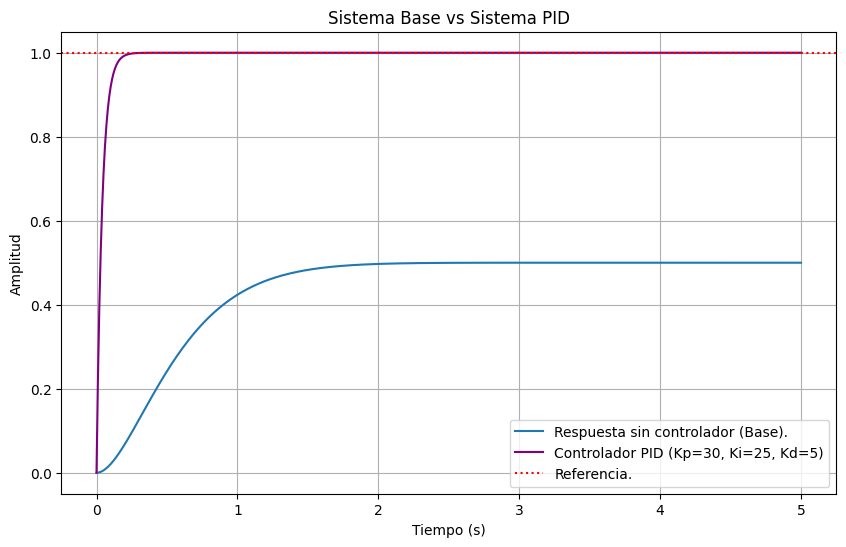

Métricas de desempeño del sistema con PID:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 0.16 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000


In [42]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s) (la misma del ejemplo) ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema base (sin controlador) para comparar ---
sistema_base = ct.feedback(Gp, 1)
t = np.linspace(0, 5, 501)
t_base, y_base = ct.step_response(sistema_base, T=t)

# --- Sintonización del Controlador PID ---
# Estas son las ganancias sintonizadas para cumplir los requisitos:
Kp = 30
Ki = 25
Kd = 5

# --- Creación del controlador PID ---
# Gc(s) = (Kd*s^2 + Kp*s + Ki) / s
num_c = [Kd, Kp, Ki]
den_c = [1, 0]
Gc_PID = ct.tf(num_c, den_c)

# --- Sistema en lazo cerrado con controlador PID ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1) 
print("Función de Transferencia del sistema con PID:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón del PID ---
t_pid, y_pid = ct.step_response(sistema_PID, T=t)

# --- Graficación de la comparativa ---
plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Respuesta sin controlador (Base).")
plt.plot(t_pid, y_pid, label=f"Controlador PID (Kp={Kp}, Ki={Ki}, Kd={Kd})", color='purple')
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.") 

plt.title("Sistema Base vs Sistema PID")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño ---
print("Métricas de desempeño del sistema con PID:")
info_PID = ct.step_info(sistema_PID, SettlingTimeThreshold=0.02)

print(f"  - Sobreimpulso (Overshoot): {info_PID['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info_PID['SettlingTime']:.2f} s")
valor_final = y_pid[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")